In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [3]:
df = pd.read_csv('./Algerian_forest_fires_cleaned_dataset.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
# encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

In [11]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,0


In [12]:
## Independent feature and dependent feature 
X = df.drop('FWI',axis=1) # Independent Feature
y=df['FWI'] # Dependent Feature

In [13]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,0
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,0
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,0


In [14]:
y # dependent feature

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [16]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0
181,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,1,0
225,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,1,0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
104,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,1,0


In [17]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [18]:
## feature selection based on the correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374689,0.609525,0.458575,0.497642,NaN
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215094,-0.694976,-0.344365,-0.409824,NaN
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073933,0.015384,0.022529,-0.088098,NaN
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296119,-0.353219,-0.301347,-0.390676,NaN
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508360,0.744270,0.592841,0.764879,NaN
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877050,0.652894,0.981876,0.581484,NaN
DC,0.374689,-0.215094,0.073933,-0.296119,0.508360,0.877050,1.000000,0.496586,0.941251,0.508639,NaN
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496586,1.000000,0.624038,0.723184,NaN
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941251,0.624038,1.000000,0.587278,NaN
Classes,0.497642,-0.409824,-0.088098,-0.390676,0.764879,0.581484,0.508639,0.723184,0.587278,1.000000,NaN


<Axes: >

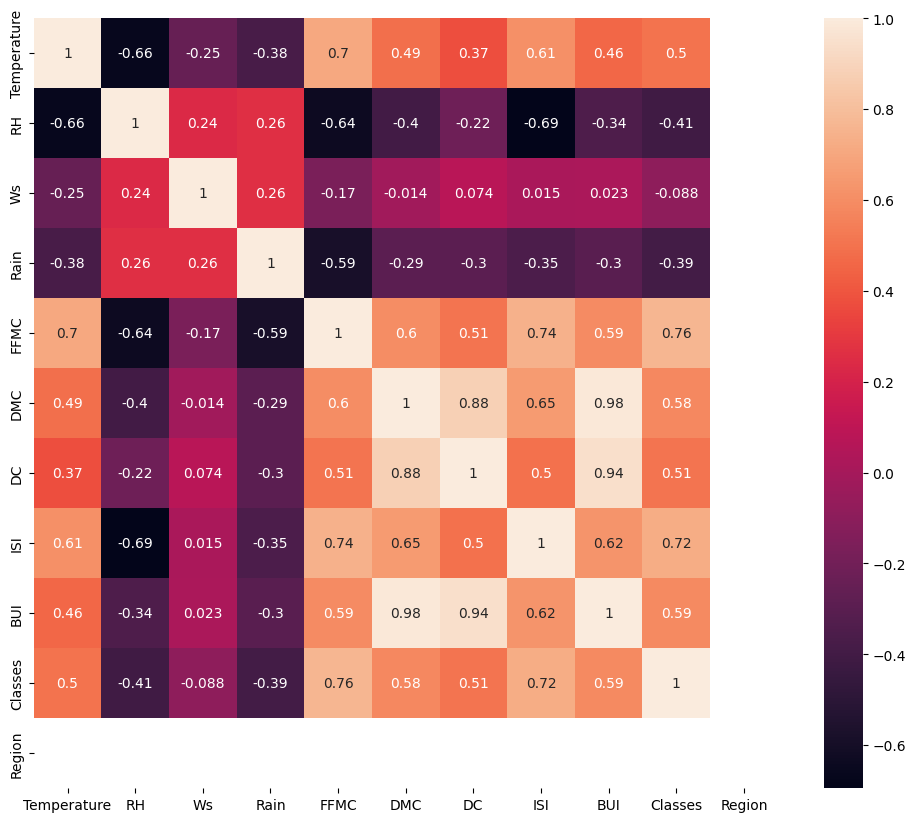

In [19]:
## check for the multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [20]:
## setting threshold value 
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [21]:
## threshold - domain expertise
corr_feature = correlation(X_train,0.85)

In [22]:
corr_feature

{'BUI', 'DC'}

In [23]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0
181,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,1,0
225,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,1,0
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
104,25,86,21,4.6,40.9,1.3,7.5,0.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,33,57,16,0.0,87.5,15.7,37.6,6.7,15.7,1,0


In [24]:
## drop feature when correlation is more than 0.85
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

## Feature Scaling and standardisation

In [25]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [26]:
X_test_scaled

array([[-2.75162156e-01,  9.51187672e-02, -2.28544571e-01,
        -3.81132246e-01,  6.38241722e-01, -4.01362602e-02,
         2.37573464e-01,  9.11043358e-01,  0.00000000e+00],
       [ 2.60525871e-01, -5.84831795e-01, -9.88974688e-01,
        -3.81132246e-01,  7.42136256e-01, -3.84555270e-01,
         4.06084874e-01,  9.11043358e-01,  0.00000000e+00],
       [ 2.60525871e-01, -9.92802132e-01,  1.51670488e-01,
        -3.81132246e-01,  7.00578442e-01, -5.44750158e-01,
         5.02377108e-01,  9.11043358e-01,  0.00000000e+00],
       [ 7.96213899e-01, -6.52826851e-01,  5.31885546e-01,
        -1.47707879e-01,  1.88032075e-01,  4.80497126e-01,
        -4.84618295e-01,  9.11043358e-01,  0.00000000e+00],
       [ 2.13543397e+00, -1.46876753e+00, -2.12961986e+00,
        -3.34447373e-01,  1.00533574e+00,  6.32682270e-01,
         1.15234969e+00,  9.11043358e-01,  0.00000000e+00],
       [ 1.86758995e+00,  9.51187672e-02, -2.50983492e+00,
         1.79086236e-01, -2.55251270e-01, -2.403798

## Box plots to understand effects of standard scaler


Text(0.5, 1.0, 'X_train After Scaling')

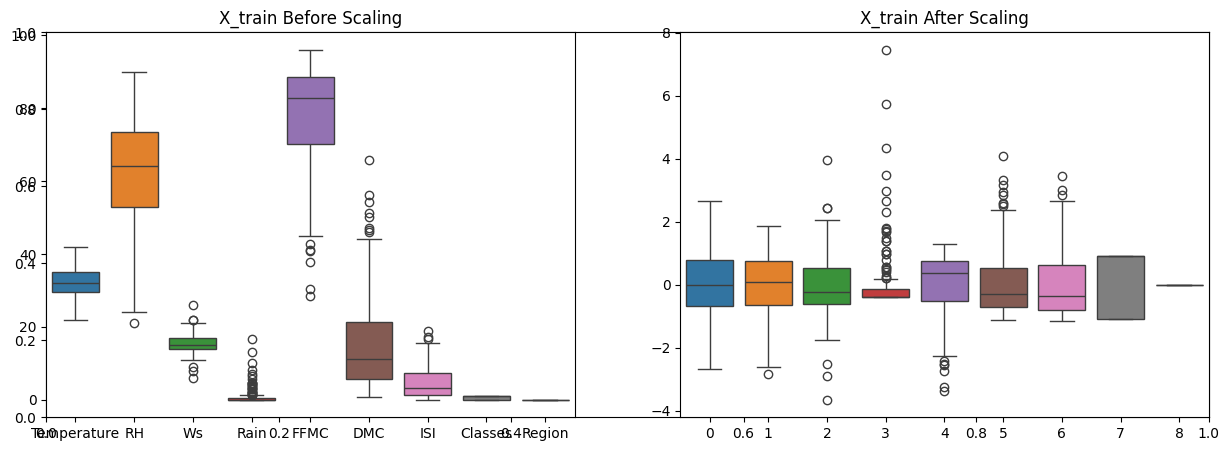

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [28]:
y_train.fillna(y_train.mean(), inplace=True)


In [29]:
X_train.isna().any()

Temperature    False
RH             False
Ws             False
Rain           False
FFMC           False
DMC            False
ISI            False
Classes        False
Region         False
dtype: bool

### Linear Regression Model

mean absolute error 0.6948629613348056
r2 score 0.9858349788351166


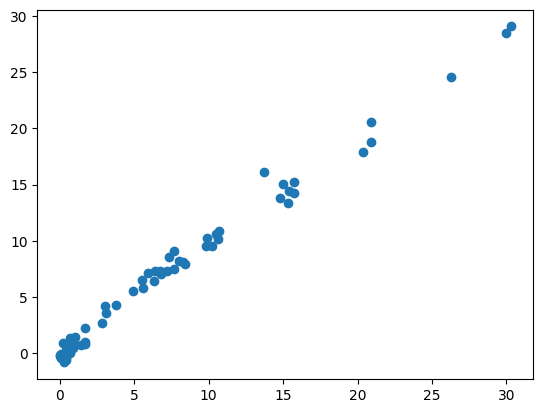

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2 score",score)
plt.scatter(y_test,y_pred)

# plt.plot(X_test_scaled,linreg.predict(X_test),'r')

## Lasso Regression

mean absolute error 1.2232866947604177
 r2 score is : 0.9498375458256897


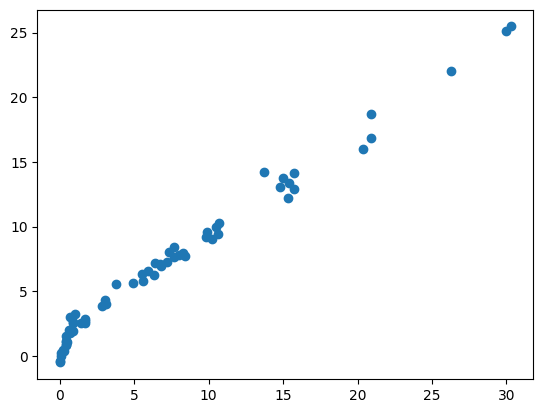

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print(" r2 score is :",score)
plt.scatter(y_test,y_pred)

## Cross validation Lasso

In [32]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

mean absolute error 0.7056092656028626
r2score 0.9854776429051791


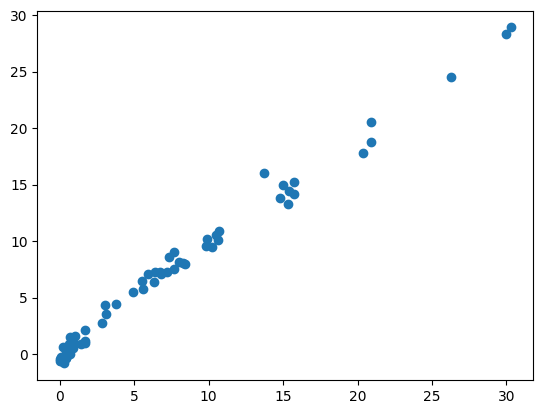

In [33]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print('r2score',score)

### Ridge Regression MOdel

Mean Absolute Error 0.7141858558300277
R2 score 0.9850547604968882


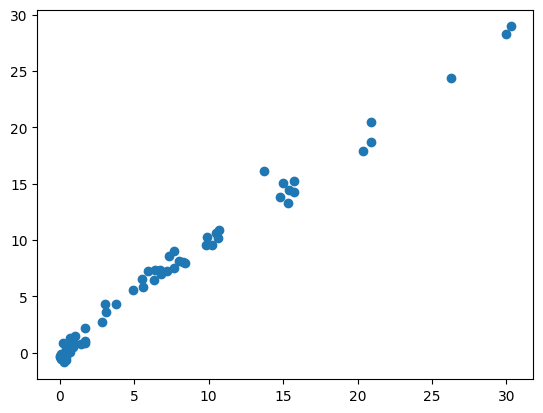

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

mean absolute error 0.7141858558300277
R2 score 0.9850547604968882


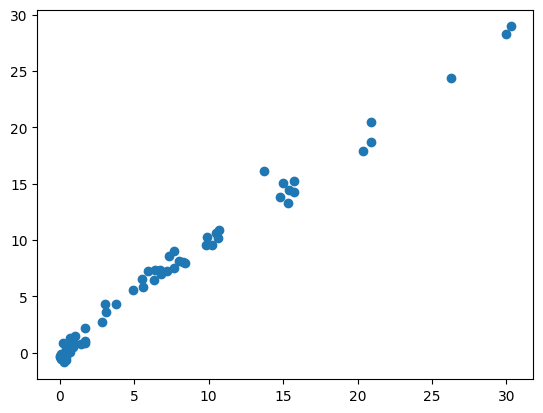

In [35]:
# RidgeCV
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("R2 score",score)

In [36]:
ridgecv.get_params() ## checking parameter

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

Mean absolute error 1.9175881421931915
R2 score 0.8752320422969636


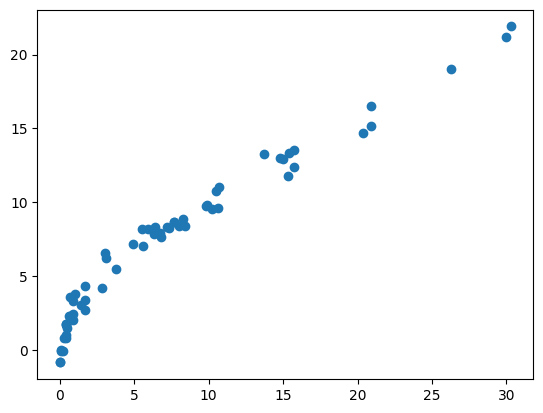

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

mean absolute error 0.7310196894458496
R2 score 0.9844300885368948


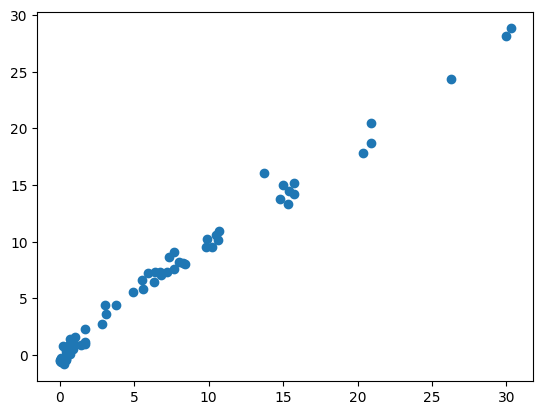

In [38]:
## elasticnetcv
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("R2 score",score)

In [39]:
elasticcv.alphas_

array([13.27952715, 12.38453147, 11.54985549, 10.77143389, 10.0454753 ,
        9.36844388,  8.73704212,  8.14819472,  7.59903367,  7.08688423,
        6.60925195,  6.16381049,  5.7483903 ,  5.36096803,  4.99965673,
        4.6626966 ,  4.34844645,  4.05537571,  3.78205696,  3.52715898,
        3.28944027,  3.06774301,  2.8609874 ,  2.66816642,  2.48834093,
        2.32063508,  2.16423205,  2.01837005,  1.88233866,  1.75547534,
        1.63716217,  1.52682292,  1.42392017,  1.32795272,  1.23845315,
        1.15498555,  1.07714339,  1.00454753,  0.93684439,  0.87370421,
        0.81481947,  0.75990337,  0.70868842,  0.6609252 ,  0.61638105,
        0.57483903,  0.5360968 ,  0.49996567,  0.46626966,  0.43484465,
        0.40553757,  0.3782057 ,  0.3527159 ,  0.32894403,  0.3067743 ,
        0.28609874,  0.26681664,  0.24883409,  0.23206351,  0.2164232 ,
        0.201837  ,  0.18823387,  0.17554753,  0.16371622,  0.15268229,
        0.14239202,  0.13279527,  0.12384531,  0.11549855,  0.10

In [40]:
## pickling the ml model , preprocessing model std

In [41]:
scaler

StandardScaler()

In [42]:
ridge

Ridge()

In [43]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))